In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
flights=pd.read_csv(r'C:\Users\smart\Downloads\TASK 3 - Flight-Delay-Prediction\archive\flights.csv')
flights=flights.sample(50000)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
483388,2015,2,2,1,UA,1200,N66831,SFO,IAH,45,...,626.0,9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3314159,2015,7,26,7,AS,59,N552AS,SEA,JNU,1255,...,1433.0,15.0,0,0,NaN,15.0,0.0,0.0,0.0,0.0
4897139,2015,11,2,1,WN,1904,N615SW,SAN,LAS,1445,...,1621.0,26.0,0,0,NaN,0.0,0.0,1.0,25.0,0.0
5502396,2015,12,11,5,UA,1177,N550UA,OGG,SFO,1235,...,1922.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5084961,2015,11,14,6,OO,4513,N897SK,SLC,SEA,1100,...,1158.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.shape

(50000, 31)

In [4]:
flights.isnull().values.any()

True

In [5]:
#Checking how many null values are there in each columns
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              125
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME           754
DEPARTURE_DELAY          754
TAXI_OUT                 778
WHEELS_OFF               778
SCHEDULED_TIME             0
ELAPSED_TIME             926
AIR_TIME                 926
DISTANCE                   0
WHEELS_ON                816
TAXI_IN                  816
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME             816
ARRIVAL_DELAY            926
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    49213
AIR_SYSTEM_DELAY       40913
SECURITY_DELAY         40913
AIRLINE_DELAY          40913
LATE_AIRCRAFT_DELAY    40913
WEATHER_DELAY          40913
dtype: int64

<AxesSubplot:xlabel='CANCELLATION_REASON', ylabel='count'>

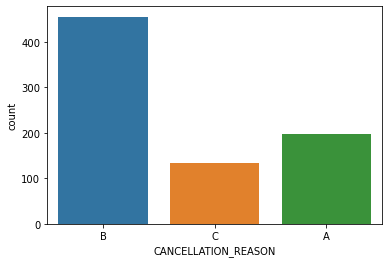

In [6]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security 

We can observe from graph easily that mostly weather is responsible for delays of flight.

<AxesSubplot:xlabel='MONTH', ylabel='count'>

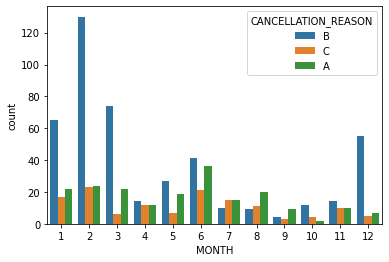

In [7]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

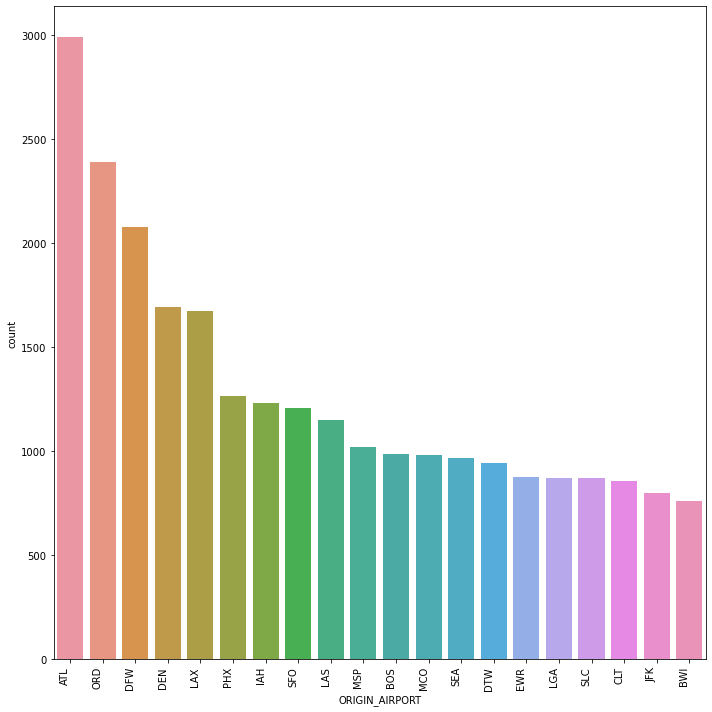

In [8]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

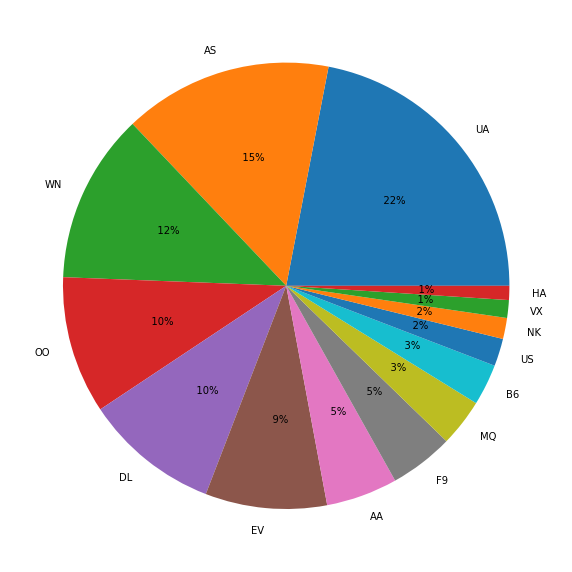

In [9]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

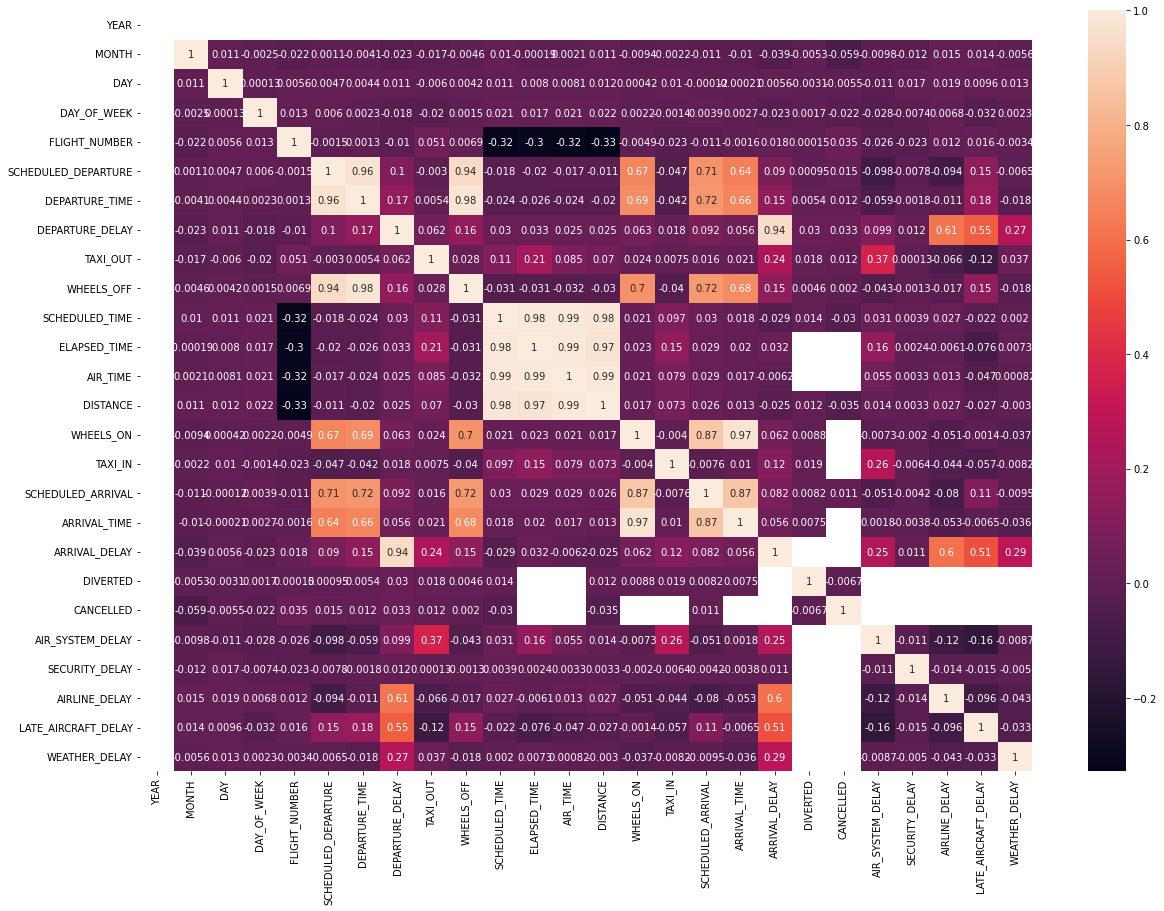

In [10]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

Very High Correlation Between Arrival Delay and Departure Delay¶

It shows that maximum of the Arrival Delays are due to the Departure Delays.


In [11]:
corr=flights.corr()
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.011072,-0.002513,-0.021760,0.001093,-0.004117,-0.022693,-0.016994,-0.004551,...,-0.011218,-0.010037,-0.038818,-0.005310,-0.059179,-0.009774,-0.011692,0.014835,0.014085,-0.005603
DAY,NaN,0.011072,1.000000,0.000127,0.005637,0.004721,0.004358,0.010609,-0.005990,0.004229,...,-0.000119,-0.000207,0.005650,-0.003076,-0.005532,-0.010641,0.016992,0.018994,0.009594,0.012822
DAY_OF_WEEK,NaN,-0.002513,0.000127,1.000000,0.012927,0.005985,0.002342,-0.017769,-0.019947,0.001486,...,0.003859,0.002702,-0.022578,0.001660,-0.021703,-0.027538,-0.007439,0.006811,-0.031527,0.002295
FLIGHT_NUMBER,NaN,-0.021760,0.005637,0.012927,1.000000,-0.001469,0.001317,-0.010159,0.051424,0.006910,...,-0.011244,-0.001624,0.017972,0.000149,0.035112,-0.025524,-0.023266,0.012070,0.016155,-0.003352
SCHEDULED_DEPARTURE,NaN,0.001093,0.004721,0.005985,-0.001469,1.000000,0.964117,0.101696,-0.002953,0.940811,...,0.708189,0.643603,0.090051,0.000950,0.015174,-0.097658,-0.007830,-0.093655,0.146466,-0.006534
DEPARTURE_TIME,NaN,-0.004117,0.004358,0.002342,0.001317,0.964117,1.000000,0.165303,0.005380,0.975519,...,0.715178,0.663896,0.150807,0.005365,0.011904,-0.058660,-0.001841,-0.010992,0.176203,-0.018248
DEPARTURE_DELAY,NaN,-0.022693,0.010609,-0.017769,-0.010159,0.101696,0.165303,1.000000,0.061609,0.157372,...,0.091755,0.056045,0.944032,0.030381,0.033447,0.099118,0.012451,0.613304,0.553438,0.266444
TAXI_OUT,NaN,-0.016994,-0.005990,-0.019947,0.051424,-0.002953,0.005380,0.061609,1.000000,0.027536,...,0.016259,0.021346,0.237848,0.018340,0.012388,0.370481,0.000131,-0.066420,-0.120691,0.037337
WHEELS_OFF,NaN,-0.004551,0.004229,0.001486,0.006910,0.940811,0.975519,0.157372,0.027536,1.000000,...,0.723946,0.680222,0.147973,0.004583,0.001958,-0.042917,-0.001260,-0.017143,0.147134,-0.017611


In [12]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [15]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())

628
627
14


In [16]:
flights=flights.dropna()
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
483388,2,2,1,UA,SFO,IAH,45,10.0,1635,9.0
3314159,7,26,7,AS,SEA,JNU,1255,-6.0,909,15.0
4897139,11,2,1,WN,SAN,LAS,1445,28.0,258,26.0
5502396,12,11,5,UA,OGG,SFO,1235,-3.0,2338,-9.0
5084961,11,14,6,OO,SLC,SEA,1100,-7.0,689,-12.0
...,...,...,...,...,...,...,...,...,...,...
2751793,6,22,1,DL,LGA,PBI,1845,52.0,1035,55.0
5308581,11,29,7,DL,ATL,OKC,816,-2.0,761,-10.0
2316067,5,27,3,WN,SLC,MDW,1600,1.0,1259,15.0
4433454,10,4,7,WN,11259,13495,740,0.0,436,-3.0


In [17]:
flights.shape

(49074, 10)

In [18]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
483388,2,2,SUNDAY,UA,SFO,IAH,45,10.0,1635,9.0
3314159,7,26,SATURDAY,AS,SEA,JNU,1255,-6.0,909,15.0
4897139,11,2,SUNDAY,WN,SAN,LAS,1445,28.0,258,26.0
5502396,12,11,THURSDAY,UA,OGG,SFO,1235,-3.0,2338,-9.0
5084961,11,14,FRIDAY,OO,SLC,SEA,1100,-7.0,689,-12.0
...,...,...,...,...,...,...,...,...,...,...
2751793,6,22,SUNDAY,DL,LGA,PBI,1845,52.0,1035,55.0
5308581,11,29,SATURDAY,DL,ATL,OKC,816,-2.0,761,-10.0
2316067,5,27,TUESDAY,WN,SLC,MDW,1600,1.0,1259,15.0
4433454,10,4,SATURDAY,WN,11259,13495,740,0.0,436,-3.0


In [19]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
483388,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3314159,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4897139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5502396,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5084961,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751793,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5308581,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2316067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4433454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=1271)

In [21]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [22]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [23]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
483388,2,2,45,10.0,1635,9.0
3314159,7,26,1255,-6.0,909,15.0
4897139,11,2,1445,28.0,258,26.0
5502396,12,11,1235,-3.0,2338,-9.0
5084961,11,14,1100,-7.0,689,-12.0
...,...,...,...,...,...,...
2751793,6,22,1845,52.0,1035,55.0
5308581,11,29,816,-2.0,761,-10.0
2316067,5,27,1600,1.0,1259,15.0
4433454,10,4,740,0.0,436,-3.0


In [24]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
483388,2,2,45,10.0,1635,9.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3314159,7,26,1255,-6.0,909,15.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4897139,11,2,1445,28.0,258,26.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5502396,12,11,1235,-3.0,2338,-9.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5084961,11,14,1100,-7.0,689,-12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751793,6,22,1845,52.0,1035,55.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5308581,11,29,816,-2.0,761,-10.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2316067,5,27,1600,1.0,1259,15.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4433454,10,4,740,0.0,436,-3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
data.shape

(49074, 1277)

In [26]:
final_data = data.sample(n=40000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
2385538,5,31,2325,-2.0,1797,-1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5196948,11,21,1225,39.0,386,33.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743620,2,18,2155,0.0,196,-17.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1328144,3,27,1030,21.0,240,15.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1888828,5,1,530,-5.0,452,-4.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116314,7,14,1715,23.0,270,35.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3034490,7,9,1913,47.0,585,38.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3071751,7,12,727,-1.0,391,4.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1950619,5,4,2050,-4.0,642,-6.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [27]:
final_data.shape

(40000, 1277)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [30]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
2385538,5,31,2325,1797,-1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5196948,11,21,1225,386,33.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743620,2,18,2155,196,-17.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1328144,3,27,1030,240,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1888828,5,1,530,452,-4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116314,7,14,1715,270,35.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3034490,7,9,1913,585,38.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3071751,7,12,727,391,4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1950619,5,4,2050,642,-6.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
Y

2385538    -2.0
5196948    39.0
743620      0.0
1328144    21.0
1888828    -5.0
           ... 
3116314    23.0
3034490    47.0
3071751    -1.0
1950619    -4.0
3009602    -1.0
Name: DEPARTURE_DELAY, Length: 40000, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
y_pred = reg_rf.predict(X_test)

In [35]:
reg_rf.score(X_train,y_train)

0.9885985991777716

In [36]:
reg_rf.score(X_test,y_test)

0.924433458646407

In [37]:
metrics.r2_score(y_test,y_pred)

0.924433458646407

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 6.21360375
MSE: 119.6019394625
RMSE: 10.936267163090887


In [39]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
3307088,1.0,-4.23
1506099,-6.0,-6.60
2707115,1.0,43.03
3884949,15.0,7.96
3167800,-7.0,0.85
...,...,...
190490,-6.0,3.47
3260409,-4.0,-1.65
5198369,4.0,-2.55
3205002,21.0,26.93


In [40]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [41]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [42]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   4.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=   8.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 61,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [45]:
p=rf_random.predict(X_test)

In [46]:
metrics.r2_score(y_test,p)

0.9165616545627863

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 6.231609494965844
MSE: 132.0609328027463
RMSE: 11.491776746993752


In [48]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
3307088,1.0,-3.817241
1506099,-6.0,-6.037407
2707115,1.0,44.308991
3884949,15.0,7.516223
3167800,-7.0,3.537701
...,...,...
190490,-6.0,2.267755
3260409,-4.0,-1.123212
5198369,4.0,-1.922321
3205002,21.0,23.301389


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [50]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 6.184254926868372
MSE: 106.49172273522291
RMSE: 10.319482677693825


In [52]:
metrics.r2_score(y_test,pre)

0.932716716751824

In [53]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
3307088,1.0,-3.658118
1506099,-6.0,-6.061754
2707115,1.0,41.012773
3884949,15.0,5.582288
3167800,-7.0,1.664225
...,...,...
190490,-6.0,2.729231
3260409,-4.0,-0.478662
5198369,4.0,-1.819737
3205002,21.0,15.554547


In [54]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [55]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_SUNDAY')
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

Flight is not delayed
